In [1]:
import sympy as sp
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [2]:
import ipympl
import ipywidgets as widgets
%matplotlib inline

In [3]:
x = sp.Symbol('x')
x

In [4]:
a, b, c, d = sp.symbols('y1__0 y_1__0 y_1^0 \\dot{m}_{1}')
a, b, c, d

In [5]:
sp.symbols('alpha beta gamma')

In [6]:
sp.symbols('x_:2__:3')

In [7]:
sp.symbols(('a:c', 'x:z'))

In [8]:
sp.symbols('x(:2)(:3)')

In [9]:
sp.symbols('x((:c))')

In [10]:
x._hashable_content()

('x', ('commutative', True))

In [11]:
((x+1)**2).equals(x**2 + 2*x + 1)

True

In [12]:
f = sp.Function('f')

In [13]:
f(x)

In [14]:
g = sp.Lambda(x, x**2 +3)
g

In [15]:
g(1)

# Expression Manipulation example Ch4
Start with an expression for the volume of a hemi-spherical capped cylinder, and its mass.  Determine length to diameter ratio that gives the minimum mass for a given volume.

In [16]:
r, L, D, Vs, Ms = sp.symbols('r L D V M', positive=True)  # NB symbols for V and M here, expressions  below

In [17]:
V = (sp.Rational(4,3)*sp.pi*r**3 + sp.pi*r**2*L).subs({r: D/2})
V

In [18]:
A = (4*sp.pi*r**2 + 2*sp.pi*r*L).subs({r:D/2})
A

In [19]:
rho, p, sigma = sp.symbols('rho p sigma', positive=True)

In [20]:
M = sp.pi*D**2*rho*p/2/sigma*(L+D/2)
M

In [21]:
# Step 1: copy original expresions to check that our manipulations don't change them
Vcopy, Mcopy = V, M

Vcopy.equals(V), Mcopy.equals(M)

(True, True)

In [22]:
# Factor the expression for V
V.factor()

In [23]:
# Divide by D**3 to get D in denominator
V.factor()/D**3

In [24]:
# Expand to get constant term plus one in L/D (quanity of interest)
(V.factor()/D**3).expand()

In [25]:
# collect to get common factor of pi out front (in general use collect_const(expr, c) by pi is special const)
(V.factor()/D**3).expand().collect(sp.pi)

In [26]:
# Multiply by D**3 to get back to original expression
V = D**3*(V.factor()/D**3).expand().collect(sp.pi)

In [27]:
V

In [28]:
Vcopy.equals(V)

True

In [29]:
# Alternative - replace factor-divide-expand-factor with simplify 
(Vcopy / D**3).simplify().collect(sp.pi)*D**3

Do the same with the expression for M

In [30]:
M = (M/D**3).expand().collect(sp.pi * p * rho / sigma)*D**3
M

In [31]:
Mcopy.equals(M)

True

Substitute and solve: ~start by writing volume equation as LHS - RHS~ actually I prefer using `sp.Eq`

In [32]:

Veq = sp.Eq(Vs, V)
Veq

In [33]:
t = sp.symbols('t', positive=True)

In [34]:
# Not what we want
Veq.subs({D**3: t})

In [35]:
Veq.xreplace({D**3: t})

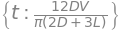

In [36]:
# Doesn't work: doesn't keep the L/D ratio we want
sp.solve(Veq.xreplace({D**3: t}), t, dict=True)[0]

In [37]:
# Solution: introduce new variable for L/D
xi = sp.symbols('xi', positive=True)
# Veq.xreplace({D**3: t, L/D: xi}) - doesn't work because of 4 in denominator
# Veq.xreplace({D**3: t, L/D/4: xi/4}) - works because applied to 
Veq.xreplace({D**3: t}).subs({L/D: xi})  # also works

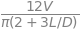

In [38]:
# We can now find the solution for D**3 in terms of V and L/D
D3 = sp.solve(Veq.xreplace({D**3: t, L/D/4: xi/4}), t)[0].subs(xi, L/D)
D3

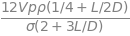

In [39]:
# And finally get the expression for M in terms of L/D constrained by the volume specification
# (text replaces M for this but I believe that then Mcopy.equals(M) would be False)
Mcons = M.xreplace({D**3: D3})
Mcons

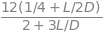

In [40]:
# Minimize by plotting.  First scale by constants and input V
M2 = Mcons/(Vs*p*rho/sigma)
M2

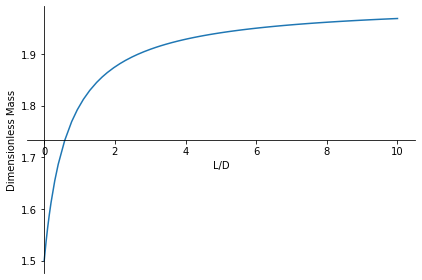

In [41]:
_ = sp.plot(M2.subs(L/D, xi), (xi, 0, 10), xlabel='L/D', ylabel='Dimensionless Mass')

In [42]:
# sp.sympify() aka sp.S() converts non-SymPy to SymPy
sp.S(8).is_real

True

In [43]:
sp.srepr(D3)

"Mul(Integer(12), Pow(pi, Integer(-1)), Symbol('V', positive=True), Pow(Add(Integer(2), Mul(Integer(3), Pow(Symbol('D', positive=True), Integer(-1)), Symbol('L', positive=True))), Integer(-1)))"

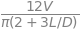

In [44]:
sp.S(sp.srepr(D3))

In [45]:
import inspect

In [46]:
# Message Resolution Order of an object
inspect.getmro(sp.Add)

(sympy.core.add.Add,
 sympy.core.expr.Expr,
 sympy.core.operations.AssocOp,
 sympy.core.basic.Basic,
 sympy.printing.defaults.Printable,
 sympy.core.evalf.EvalfMixin,
 object)

In [47]:
expr1 = x**2 + x*sp.cos(x) - 1/x
expr1

In [48]:
expr1.atoms()

In [49]:
expr1.free_symbols

In [50]:
expr1.args

In [51]:
expr1.func

sympy.core.add.Add

In [52]:
m, A, B, C, D = sp.symbols('m A B C D')
t = m/2*(1+1/A)
expr = C**2*t + D**2*t + B
expr

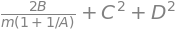

In [53]:
expr.func(*(term/t for term in expr.args))

In [54]:
x, y, z, a, b = sp.symbols('x:z a:b')
expr = x**2 + 2*y*z
expr

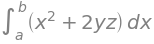

In [55]:
integ = sp.Integral(expr, (x, a, b))
integ

In [56]:
integ.bound_symbols

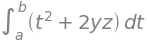

In [57]:
t = sp.symbols('t')
integ.replace(x, t)

In [58]:
sp.srepr(integ)

"Integral(Add(Pow(Symbol('x'), Integer(2)), Mul(Integer(2), Symbol('y'), Symbol('z'))), Tuple(Symbol('x'), Symbol('a'), Symbol('b')))"

In [59]:
n = sp.symbols('n', positive=True, integer=True)
sp.Sum(1/2**n, (n, 0, sp.oo)).doit()

In [60]:
n = sp.symbols('n', positive=True, integer=True)
sp.summation(1/2**n, (n,0,sp.oo))

In [61]:
from sympy.stats import Normal

In [64]:
mu0, mu1 = sp.symbols('mu:2', real=True)
mu0, mu1

In [65]:
sigma0, sigma1 = sp.symbols('sigma:2', positive=True)
sigma0, sigma1

In [68]:
N0 = Normal('N_0', mu0, sigma0)
N1 = Normal('N_1', mu1, sigma1)
N0, N1

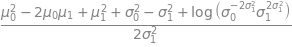

In [84]:
x = sp.symbols('x', real=True)
p = sp.stats.density(N0)(x) # .subs({mu0:0, sigma0: 1})
q = sp.stats.density(N1)(x)

sp.integrate(p*(sp.log(p) - sp.log(q)), (x, -sp.oo, sp.oo)).simplify()